In [1]:
import pandas as pd # used in data manipulations and analysis
import numpy as np  # used for numerical computations
import re # regular expressions (pattern matching and searching)

# nltk : Natural Language Toolkit
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer # for stemming (gives root word)
# TF-IDF (Term Frequency-Inverse Document Frequency) 
from sklearn.feature_extraction.text import TfidfVectorizer # convert text to numerical feature vector
from sklearn.model_selection import train_test_split # split data into train & test set

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # Support Vector Classifier (SVC) 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt # for ploting (data visualization)

In [2]:
# import nltk
# nltk.download('stopwords') # downloading all the stopwords if not already present

In [3]:
print(stopwords.words('English')) # words that dosen't add much value to data set

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Data Pre-processing

In [4]:
news_dataset = pd.read_csv('train.csv') # loading the Data Set

In [5]:
news_dataset.shape # number of rows and cloumns

(20800, 5)

In [6]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
news_dataset.isnull().sum() # checking the missing values

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
news_dataset = news_dataset.fillna('') #replacing null values with empty string

In [9]:
news_dataset.isnull().sum() # no null values

id        0
title     0
author    0
text      0
label     0
dtype: int64

Merging (author) and (title) into new column and storing it in X : 

In [10]:
X = news_dataset['author'] + ' ' + news_dataset['title']

In [11]:
X.head()

0    Darrell Lucus House Dem Aide: We Didn’t Even S...
1    Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2    Consortiumnews.com Why the Truth Might Get You...
3    Jessica Purkiss 15 Civilians Killed In Single ...
4    Howard Portnoy Iranian woman jailed for fictio...
dtype: object

Seperating label column from data set

In [12]:
Y = news_dataset['label'] # storing label in Y

In [13]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

## Stemming

Reducing words (prefix & suffix) to its root word

In [14]:
port_stem = PorterStemmer() # creating instance

In [15]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content) # replace anything other than a_z with ' '
    stemmed_content = stemmed_content.lower() # convert to lower case 
    stemmed_content = stemmed_content.split() # split all the words to list
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] # stemming + removing stopwords
    stemmed_content = ' '.join(stemmed_content) # again joining all words with ' '
    return stemmed_content

Applying stemming on X

In [16]:
X = X.apply(stemming)

In [17]:
X.head()

0    darrel lucu hous dem aid even see comey letter...
1    daniel j flynn flynn hillari clinton big woman...
2               consortiumnew com truth might get fire
3    jessica purkiss civilian kill singl us airstri...
4    howard portnoy iranian woman jail fiction unpu...
dtype: object

separating the data and label (into array format)

In [18]:
X = X.values # Data Array
Y = Y.values # Label

In [19]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [20]:
print(Y)

[1 0 1 ... 0 1 1]


In [21]:
X.shape

(20800,)

In [22]:
Y.shape

(20800,)

## Vectorizing (Textual data to numerical data)

In [23]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X) # converting into feature vector

X = vectorizer.transform(X)

In [24]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

## Spliting the data set to traning and test data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

stratify=Y :
class distribution in the target variable Y is preserved in both the training and testing sets (equal 0 & 1)

random_state=2 :
ensures that the split is reproducible

# KNN:

Training the model on Train data

In [26]:
knn = KNeighborsClassifier(n_neighbors = 4)

In [27]:
knn.fit(X_train, Y_train) # traning model on Train data

KNeighborsClassifier(n_neighbors=4)

Predicting the Test data.

In [28]:
X_predict = knn.predict(X_test)

/Users/gurkamal/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Evaluation

In [29]:
knn_accuracy = accuracy_score(X_predict, Y_test)*100

In [30]:
print('Accuracy of our KNN model is: ', knn_accuracy, '%')

Accuracy of our KNN model is:  53.605769230769226 %


In [31]:
confusion_matrix(X_predict, Y_test)

array([[ 147,    0],
       [1930, 2083]])

# Logistic Regression: 

Training the Model

In [32]:
model = LogisticRegression()

In [33]:
model.fit(X_train, Y_train)

LogisticRegression()

Predicting the Train data

In [34]:
X_train_predict = model.predict(X_train) # prediction

In [35]:
accuracy_train = accuracy_score(X_train_predict, Y_train)*100 # calculating accuracy
print('Accuracy of Train data: ',accuracy_train, '%')

Accuracy of Train data:  98.65985576923076 %


Predicting the Test data

In [36]:
X_test_predict = model.predict(X_test) # prediction

In [37]:
LR_accuracy = accuracy_score(X_test_predict, Y_test)*100 # calculating accuracy
print('Accuracy of Test data: ',LR_accuracy, '%')

Accuracy of Test data:  97.90865384615385 %


In [38]:
confusion_matrix(X_test_predict, Y_test)

array([[2004,   14],
       [  73, 2069]])

## Making a Predictive System (Logistic Regression):

In [39]:
X_new = X_test[3] # model hasen't seen test data
prediction = model.predict(X_new)
print(prediction)

if(prediction == 0):
    print("News is Real")
else:
    print("News is Fake")

[0]
News is Real


In [40]:
print(Y_test[3])

if(Y_test[3] == 0):
    print("News is Real")
else:
    print("News is Fake")

0
News is Real


Our model's prediction is matching the original label.
Hence, Prediction is correct.

# SVM (SUPPORT VECTOR MACHINE):

Training the model

In [41]:
classifier = SVC(kernel="linear") # we need a linear decision boundary

In [42]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Predicting the Train data

In [43]:
X_train_predict = classifier.predict(X_train)

In [44]:
accuracy_train = accuracy_score(X_train_predict, Y_train)*100

In [45]:
print('Accuracy of Train data: ', accuracy_train, '%')

Accuracy of Train data:  99.74158653846153 %


Predicting the Test data

In [46]:
X_test_predict = classifier.predict(X_test)

In [47]:
SVM_accuracy = accuracy_score(X_test_predict, Y_test)*100

In [48]:
print('Accuracy of Test data: ', SVM_accuracy, '%')

Accuracy of Test data:  99.13461538461539 %


In [49]:
confusion_matrix(X_test_predict, Y_test)

array([[2057,   16],
       [  20, 2067]])

## Making the Predictive system (SVM):

In [50]:
X_new = X_test[3] # model hasen't seen test data
prediction = classifier.predict(X_new)
print(prediction)

if(prediction == 0):
    print("News is Real")
else:
    print("News is Fake")

[0]
News is Real


In [51]:
print(Y_test[3])

if(Y_test[3] == 0):
    print("News is Real")
else:
    print("News is Fake")

0
News is Real


Our model's prediction is matching the original label. Hence, Prediction is correct.

# COMPARING ACCURACY OF ALGORITHMS

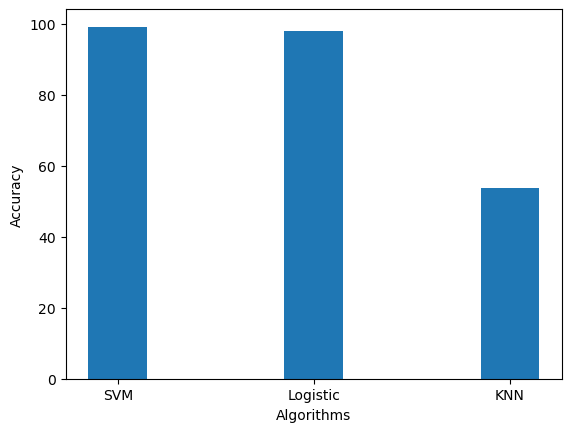

In [52]:
x_axis = ['SVM', 'Logistic', 'KNN']
y_axis = [SVM_accuracy, LR_accuracy, knn_accuracy]

plt.bar(x_axis, y_axis, width=0.3)

plt.xlabel('Algorithms')
plt.ylabel('Accuracy')

plt.show()